In [1]:
##necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [2]:
import os, re, collections
print(os.listdir("stacksample"))

['Answers.csv', 'Questions.csv', 'Tags.csv']


In [3]:
ques = pd.read_csv('stacksample/Questions.csv',encoding='iso-8859-1')
ques.head(10)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [4]:
ques.drop(["OwnerUserId","CreationDate","ClosedDate","Score"], axis=1, inplace=True)
ques.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,Automatically update version number,<p>I would like the version property of my app...
9,810,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [5]:
def rem_html_tags(body):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', body)

In [6]:
ques['Body'] = ques['Body'].apply(rem_html_tags)
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [7]:
df_tags = pd.read_csv('stacksample/Tags.csv', encoding='iso-8859-1')
df_tags.head(10)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
5,90,branch
6,90,branching-and-merging
7,120,sql
8,120,asp.net
9,120,sitemap


In [8]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


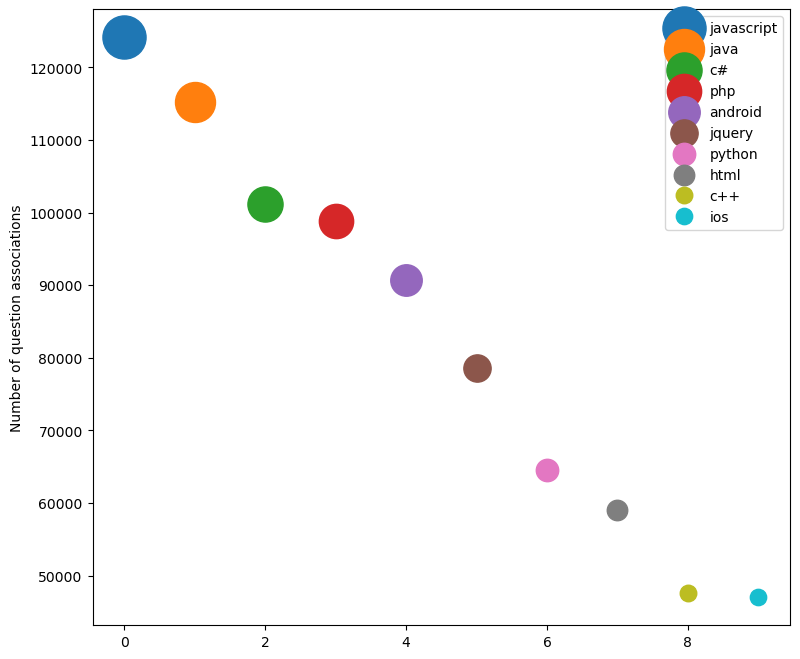

In [9]:
tagCount =  collections.Counter(list(df_tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [10]:
top10_tags=[tag[0] for tag in tagCount]  #['javascript','java','c#','php','android','jquery','python','html','c++','ios']
top10_tags

['javascript',
 'java',
 'c#',
 'php',
 'android',
 'jquery',
 'python',
 'html',
 'c++',
 'ios']

In [11]:
tag_top10= df_tags[df_tags.Tag.isin(top10_tags)]
print (tag_top10.shape)
tag_top10.head()

(826739, 2)


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [12]:
tag_top10['Id'].value_counts().head(10)

4009250     5
30798790    5
30289880    5
23484760    5
35318730    5
23267320    5
30991580    5
31085960    5
35283570    5
11648170    5
Name: Id, dtype: int64

In [ ]:
def add_tags(question_id):
    return tag_top10[tag_top10['Id'] == question_id['Id']].Tag.values

top10 = tag_top10.apply(add_tags, axis=1)

In [ ]:
len(top10),tag_top10.shape

In [ ]:
tag_top10=pd.concat([tag_top10, top10.rename('Tags')], axis=1)
tag_top10.head()

In [ ]:
tag_top10.drop(["Tag"], axis=1, inplace=True)
tag_top10.shape

In [ ]:
top10_tags=tag_top10.loc[tag_top10.astype(str).drop_duplicates().index]

In [ ]:
ques.head()

In [ ]:
total=pd.merge(ques, top10_tags, on='Id')
print(total.shape)
total.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, GRU ,concatenate
from keras.models import Model

In [ ]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(total.Tags)
labels = multilabel_binarizer.classes_
labels

In [ ]:
train,test=train_test_split(total[:550000],test_size=0.25,random_state=24)

In [ ]:
train.shape,test.shape

In [ ]:
train.head()

In [ ]:
##Loading the dataset
train = pd.read_csv("train.csv")
train.head()

In [ ]:
train['Cleaned_tags'] = train['Tags'].map(str).replace(r'[\[\]\'\,]','',regex=True)

In [ ]:
train.head()

In [ ]:
##Creating the target dataframe(as its a multilabel problem)
pd.options.display.max_columns = 200

dummy = train['Cleaned_tags'].str.get_dummies(' ')

print("The number of unique tags are {}".format(dummy.shape[1]))

dummy.head()


In [ ]:
##is there any null values
train.isnull().sum()

In [ ]:
##Lets check the distribution of each tags 
tot_tags = ' '.join(train['Cleaned_tags'])
tot_tags = ','.join(tot_tags.split())

In [ ]:
##Calling counter
from collections import Counter,OrderedDict
counting = Counter(tot_tags.split(','))
count_dict = OrderedDict(counting.most_common(50))

In [ ]:
##getting the keys and values
key = []
vals = []
for i,j in zip(count_dict.keys(),count_dict.values()):
    key.append(i)
    vals.append(j)
    
plt.figure(figsize = (16,6))
sns.set(color_codes = True)
sns.barplot(x = key,y = vals)
plt.xticks(rotation = 90)
plt.xlabel('tags')
plt.ylabel('frequency')
plt.title("Distributon of MOST COMMON TAGS UNSED(50)")

In [ ]:
##Visualization

##Plotting the word cloud for javascript.

from wordcloud import WordCloud

def word_cloud(tag):
    '''
    This function plots the wordcloud for the respective tag
    
    arguments:--
    tag is a string .
    returns the wordcloud
    '''
    plt.figure(figsize = (16,6))
    string = pd.Series(train['title'].loc[(train['cleaned_tags'] == tag)]).str.cat(sep = ' ')
    wc = WordCloud(width = 5000,height = 4000).generate(string)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(tag)
    plt.show()
    
    
for tag in ['javascript','java','python','c#','php']:
    word_cloud(tag)


# Custom Word Embedding using GENSIM  

In [0]:
##Necessary imports

import multiprocessing
import re
import os
import json
import gensim.models.word2vec as w2v
import sklearn.manifold as mf
import tensorflow as tf


In [0]:
##Preparing the text corpus
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

train['new_title'] = train['title'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
##Tokenizing the words
train['new_title'] = train['new_title'].map(lambda z: z.split())
train['new_title'].head()

0                            [draw, stack, dotplot, r]
1    [mysql, select, record, datetime, field, le, s...
2                  [terminate, window, phone, 81, app]
3    [get, current, time, specific, country, via, j...
4                        [configure, tomcat, use, ssl]
Name: new_title, dtype: object

In [0]:
##Defining the word2vec model

##HYPERPARAMETERS
num_features = 300
min_word_count = 3
num_workers = multiprocessing.cpu_count()
context_size = 4
downsampling = 1e-3
seed = 1

##Model definition
model2vec = w2v.Word2Vec(sg = 1,
                        seed = seed,
                        workers = num_workers,
                        size = num_features,
                        min_count = min_word_count,
                        window = context_size,
                        sample = downsampling)

##building the vocab

titles = list(train['new_title'])
model2vec.build_vocab(titles)

##Training the model
model2vec.train(titles,total_examples = model2vec.corpus_count,epochs = 100)

##saving the model
model2vec.save('embedding_index.bin')

Text(0.5, 1.0, 'Word Embeddings')

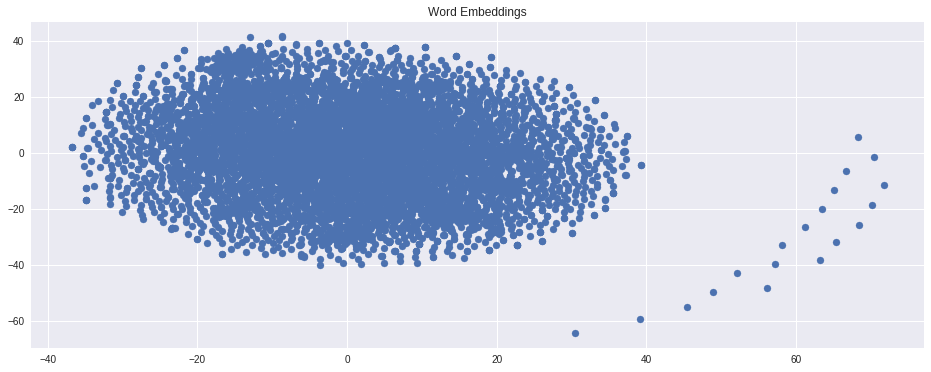

In [0]:
##Plotting using TSNE
tsne = mf.TSNE(n_components = 2,random_state = 0)
matrix = model2vec.wv.vectors
matrix_2d = tsne.fit_transform(matrix)

points = pd.DataFrame([(word,coords[0],coords[1]) 
                      for word,coords in [(word,matrix_2d[model2vec.wv.vocab[word].index])
                                         for word in model2vec.wv.vocab]],
                      columns = ['word','x','y'])

plt.figure(figsize = (16,6))
plt.scatter(points['x'],points['y'])

plt.title("Word Embeddings")

# Model Definition

In [0]:
##Loading the trained word2vec model
embedding = w2v.Word2Vec.load('embedding_index.bin')

In [0]:
##Seperating the dataset
X = train['title'].values
y = dummy.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 1001)
print("shape of X_train is {} and y_train is {}".format(X_train.shape,y_train.shape))
print("shape of X_test is {} and y_test is {}".format(X_test.shape,y_test.shape))

shape of X_train is (89999,) and y_train is (89999, 100)
shape of X_test is (10000,) and y_test is (10000, 100)


In [0]:
##Loading the embedding
MAX_NB_WORDS = len(model2vec.wv.vocab)

##seq length got from "train['title'].map(lambda z: len(z.split())).mean()"
max_seq_length = 10

##text preprocessing
from keras.preprocessing.text import Tokenizer
max_words = 100000
##on train
tokenizer = Tokenizer(num_words = max_words,lower = True,oov_token = 'UNK')
tokenizer.fit_on_texts(X_train)
word_ids = tokenizer.word_index
print(word_ids)

##on test
tokenizer_test = Tokenizer(num_words = max_words,lower = True,oov_token = 'UNK')
tokenizer_test.fit_on_texts(X_test)
word_ids_test = tokenizer_test.word_index

{'UNK': 1, 'to': 2, 'in': 3, 'a': 4, 'how': 5, 'the': 6, 'of': 7, 'with': 8, 'and': 9, 'from': 10, 'c': 11, 'using': 12, 'is': 13, 'on': 14, 'not': 15, 'for': 16, 'java': 17, 'i': 18, 'php': 19, 'an': 20, 'file': 21, 'javascript': 22, 'error': 23, 'get': 24, 'python': 25, 'string': 26, 'array': 27, 'data': 28, 'jquery': 29, 'when': 30, 'do': 31, 'value': 32, 'can': 33, 'net': 34, 'function': 35, 'or': 36, 'object': 37, 'class': 38, 'use': 39, 'list': 40, 'method': 41, 'multiple': 42, 'if': 43, 'into': 44, 'text': 45, 'by': 46, 'it': 47, 'does': 48, 'page': 49, 'image': 50, 'what': 51, 'as': 52, 'form': 53, 'json': 54, 'create': 55, 'html': 56, 'why': 57, 'type': 58, 'rails': 59, 'mysql': 60, 'code': 61, 'set': 62, 'asp': 63, 'add': 64, 'database': 65, 'server': 66, 'working': 67, 'android': 68, 'convert': 69, '2': 70, 'variable': 71, 'values': 72, 'application': 73, 'js': 74, 'change': 75, 'way': 76, 'one': 77, 'button': 78, 'find': 79, 'my': 80, 'after': 81, 'all': 82, 'django': 83, '

In [0]:
##converting the training data to the sequence of word indices:
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test  = tokenizer_test.texts_to_sequences(X_test)

In [0]:
##padding the semtences so as to make them equal sized.
from keras.preprocessing.sequence import pad_sequences
text_data = pad_sequences(seq_train,max_seq_length,truncating="pre")
text_data_test = pad_sequences(seq_test,max_seq_length,truncating="pre")

In [0]:
WV_DIM = 300
nb_words = min(MAX_NB_WORDS, max_words)
word_vectors = model2vec.wv
# we initialize the matrix with random numbers
wv_matrix = (np.random.rand(nb_words, WV_DIM) - 0.5) / 5.0
for word, i in word_ids.items():
    if i >= MAX_NB_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        # words not found in embedding index will be all-zeros.
        wv_matrix[i] = embedding_vector
    except:
        pass        

In [0]:
##model building
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

In [0]:

##initializing the embedding layer
wv_layer = Embedding(nb_words,
                     WV_DIM,
                     mask_zero=False,
                     weights=[wv_matrix],
                     input_length=max_seq_length,
                     trainable=False)

# Inputs
text_input = Input(shape=(max_seq_length,), dtype='int32')
embedded_sequences = wv_layer(text_input)

# biLSTM-1
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)
x = Bidirectional(CuDNNLSTM(32, return_sequences=False))(embedded_sequences)

# Dense-1
x2 = Dropout(0.2)(x)
x2 = BatchNormalization()(x2)
x2 = Dense(265, activation='relu')(x2)

# output
x3 = Dropout(0.2)(x2)
x3 = BatchNormalization()(x3)
pred = Dense(100,activation = 'sigmoid')(x3)


# build the model
model = Model(inputs=[text_input], outputs=pred)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001, clipnorm=.25, beta_1=0.7, beta_2=0.99),
              metrics=['accuracy'])

# getting the summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 10, 300)           2184900   
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 10, 300)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                85504     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 265)               17225     
__________

In [0]:
##Fitting the model
history = model.fit([text_data], y_train, validation_split=0.09,
                 epochs=10, batch_size=32, shuffle=True)

Train on 81899 samples, validate on 8100 samples
Epoch 1/10
81899/81899 [==============================] - 39s 474us/step - loss: 0.0783 - acc: 0.9732 - val_loss: 0.0424 - val_acc: 0.9874
Epoch 2/10
81899/81899 [==============================] - 37s 454us/step - loss: 0.0450 - acc: 0.9869 - val_loss: 0.0399 - val_acc: 0.9880
Epoch 3/10
64704/81899 [======================>.......] - ETA: 7s - loss: 0.0429 - acc: 0.9874

In [0]:
##Prediction 
y_pred = model.predict(text_data_test)

In [0]:
model.evaluate([text_data_test],y_test)

10000/10000 [==============================] - 1s 102us/step


0.11540536272525788